In [7]:
import os
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MultipleLocator
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

linest = "-"
markerst = '.'
lw = 3
ms = 9

title_font_size = 24
xylabel_size = 22
tick_font_size = 22
legend_font_size = 20

def sketchlib_plot(ax):
    PS = [6, 7, 8, 10]
    SALU = []
    hashcall = []
    SRAM = []
    for d in range(1, 8):
        SALU.append(9 * d)
        hashcall.append(9 * d)
        SRAM.append(34 * d)

    PS_P = []
    SALU_P = []
    hashcall_P = []
    SRAM_P = []
    for d in range(0, 4):
        PS_P.append(PS[d]/12*100)

    for d in range(0, 7):
        SALU_P.append(SALU[d]/(4*12)*100)
        hashcall_P.append(hashcall[d]/(6*12)*100)
        SRAM_P.append(SRAM[d]/(80*12)*100)

    x1 = [1, 2, 3, 4]
    x2 = [4, 5, 6, 7]

    x = [1, 2, 3, 4, 5, 6, 7]

    ax.plot(x1, PS_P, label='Pipeline Stages', color="C0", marker=".", linestyle=linest, linewidth=lw, markersize = ms)
    ax.plot(x1, SALU_P[:4], label='SALUs', color="C1", marker="^", linestyle=linest, linewidth=lw, markersize = ms)
    ax.plot(x1, hashcall_P[:4], label='Hash Units', color="C2", marker="x", linestyle=linest, linewidth=lw, markersize = ms)
    ax.plot(x1, SRAM_P[:4], label='SRAM', color="C4", marker="|", linestyle=linest, linewidth=lw, markersize = ms)

    ax.plot(x2, SALU_P[3:], color="C1", marker="^", linestyle='--', linewidth=lw, markersize = ms)
    ax.plot(x2, hashcall_P[3:], color="C2", marker="x", linestyle='--', linewidth=lw, markersize = ms)
    ax.plot(x2, SRAM_P[3:], color="C4", marker="|", linestyle='--', linewidth=lw, markersize = ms)

    ax.yaxis.set_major_locator(MultipleLocator(50))
    ax.axhline(y=100, color='red', linestyle="--", linewidth=2)
    # ax.axvline(x=4, color='black', linestyle="--", linewidth=1)
    ax.set_ylim([-5, 150])
    ax.set_ylabel('Resource Use (\%)', fontsize=xylabel_size)
    ax.set_xlabel('Number of Sketch Instances in Ensemble', fontsize=xylabel_size)
    ax.xaxis.set_label_coords(1.9, -0.26)

    ax.set_xticks([1,2,3,4,5,6,7])
    ax.set_xticklabels([1,2,3,4,5,6,7], fontsize=tick_font_size)
    ax.tick_params(labelsize=tick_font_size)
    ax.set_title("SketchLib", fontsize=title_font_size)
    ax.legend(fontsize=legend_font_size, loc="lower left", bbox_to_anchor = (-0.1, 1.15, 1, 0.2), ncol=2, handletextpad=0.2)

    ax.grid(color='gray', linestyle='--', linewidth=1, axis='y')

def p4all_plot(ax):
    PS = [6, 7, 8, 10, 10, 10, 11]
    SALU = []
    hashcall = []
    SRAM = []
    for d in range(1, 5):
        SALU.append(9 * d)
        hashcall.append(9 * d)
        SRAM.append(34 * d)

    SALU += [36, 36, 36]
    hashcall += [36, 36, 36]
    SRAM += [143, 150, 157]

    PS_P = []
    SALU_P = []
    hashcall_P = []
    SRAM_P = []
    for d in range(0, 7):
        PS_P.append(PS[d]/12*100)
        SALU_P.append(SALU[d]/(4*12)*100)
        hashcall_P.append(hashcall[d]/(6*12)*100)
        SRAM_P.append(SRAM[d]/(80*12)*100)

    x = [1, 2, 3, 4, 5, 6, 7]


    ax.plot(x, PS_P, label='Pipeline Stage', color="C0", marker=".", linestyle=linest, linewidth=lw, markersize = ms)
    ax.plot(x, SALU_P, label='SALU', color="C1", marker="^", linestyle=linest, linewidth=lw, markersize = ms)
    ax.plot(x, hashcall_P, label='Hash Unit', color="C2", marker="x", linestyle=linest, linewidth=lw, markersize = ms)
    ax.plot(x, SRAM_P, label='SRAM', color="C4", marker="|", linestyle=linest, linewidth=lw, markersize = ms)

    ax.yaxis.set_major_locator(MultipleLocator(50))
    ax.axhline(y=100, color='red', linestyle="--", linewidth=2)
    # ax.axvline(x=4, color='black', linestyle="--", linewidth=1)

    ax.set_ylim([-5, 150])
    # ax.set_ylabel('Resource Use (\%)', fontsize=16)
    # ax.set_xlabel('Number of Sketch Instances', fontsize=16)

    ax.set_xticks([1,2,3,4,5,6,7])
    ax.set_xticklabels([1,2,3,4,5,6,7], fontsize=tick_font_size)
    # ax.set_yticklabels([])
    ax.tick_params(labelsize=tick_font_size)
    ax.set_title("P4All", fontsize=title_font_size)

    # ax.legend(fontsize=19, bbox_to_anchor = (1, 1, 0.3, 0.2), ncol=1, handletextpad=0.2)
    ax.grid(color='gray', linestyle='--', linewidth=1, axis='y')

def accuracy_plot(ax):
    data = []
    data.append([3.8595, 2.3286, 2.8123, 2.5321, 2.8047, 2.671, 2.800])
    data.append([3.8595, 2.3286, 2.8123, 2.5321, 3.4630, 4.3442, 8.6152])

    x = [1, 2, 3, 4, 5, 6, 7]
    labels = ['1', '2', '3', '4', '5', '6', '7']

    linest = "-"
    markerst = '.'

    ax.plot(x, data[0], label='SketchLib', color="C5", marker="^", linestyle=linest)
    ax.plot(x, data[1], label='P4All', color="C6", marker="s", linestyle=linest)
    ax.set_ylabel('Ensenble Error (\%)', fontsize=xylabel_size)

    ax.set_ylim([1, 9])
    ax.yaxis.set_major_locator(MultipleLocator(2))

    ax.set_xticks([1,2,3,4,5,6,7])
    ax.set_xticklabels([1,2,3,4,5,6,7], fontsize=tick_font_size)
    ax.tick_params(labelsize=tick_font_size)
    ax.set_title("Accuracy Result", fontsize=title_font_size)

    ax.legend(fontsize=legend_font_size, loc="lower left", bbox_to_anchor = (-0.1, 1.15, 1, 0.2), ncol=1, handletextpad=0.2)
    ax.grid(color='gray', linestyle='--', linewidth=1, axis='y')


/Users/hnamkung/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/Users/hnamkung/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.


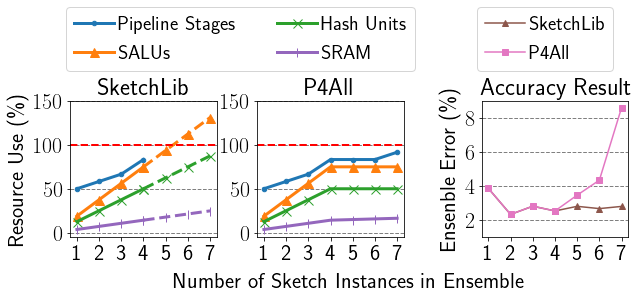

In [8]:
fig = plt.figure(figsize=(10, 2.5), constrained_layout=True)

ax1 = plt.subplot2grid(shape=(1, 30), loc=(0, 0), colspan=8, rowspan=1)
ax2 = plt.subplot2grid(shape=(1, 30), loc=(0, 10), colspan=8, rowspan=1)
ax3 = plt.subplot2grid(shape=(1, 30), loc=(0, 22), colspan=8, rowspan=1)

sketchlib_plot(ax1)
p4all_plot(ax2)
accuracy_plot(ax3)

# latex_path = "/Users/hnamkung/hun-latex/Hun-multi-dim-sketches/nsdi23/figures/3_bottleneck"
latex_path = "."
file_name = 'resource.pdf'
full_path = os.path.join(latex_path, file_name)
# file_name = 'overall_accuracy.png'
import os
plt.tight_layout()
plt.savefig(full_path, bbox_inches='tight')
plt.show()

# plt.subplot(1, 10, index)
    # bar_plot(before_list, after_list, picked_sketch_name, f"{short_name} ({inst_count})", ylabel)

# plt.tight_layout()
